<a href="https://colab.research.google.com/github/aradhyajain430/chem-1560k/blob/main/Exercise_1_CHEM_1560K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:

import numpy as np
import matplotlib.pyplot as plt

# Generates the kinetic energy operator with a for loop
def kineticOP(big_N: int, mass: float, L: float) -> np.ndarray:
    dx = L / (big_N - 1)
    n = big_N - 2
    array = np.zeros((n,n), float)
    for i in range(n-1):
        array[i, i] = -2.0
        array[i + 1, i] = 1.0
        array[i, i + 1] = 1.0
    array[n-1, n-1] = -2.0

    return -(array / (dx * dx * 2 * mass))


In [95]:
# This cell performs the next step of the analysis
def test_kineticOP():
    T = kineticOP(6, 1.0, 1.0)
    v = np.array([0.0, 1.0, 0.0, 0.0])
    return np.dot(T, v)

# Print key numeric results
print(test_kineticOP())


# should return something of the structure k(-1, 2, -1, 0).
# We are testing the ability of the kinetic operator to
# return the expected state of the kinetic energy in the position basis

[-12.5  25.  -12.5   0. ]


In [96]:
# This cell performs the next step of the analysis
N = 11
m = 1.0
L = 1.0
H = kineticOP(N, m, L)
E, V = np.linalg.eigh(H)

# Calculate the first 9 eigenvalues and compare to the analytical eigenvalues

# Loop over inputs to compute results
for n in range(1,10):
    Eex = n**2 * np.pi*np.pi / 2

# Print key numeric results
    print(n, E[n-1], abs(E[n-1]-Eex), str((E[n-1]-Eex) * 100 /Eex) + "%")

1 4.894348370484679 0.040453830059999696 -0.8197659889090307%
2 19.09830056250524 0.6409082396734753 -3.2468790724921814%
3 41.221474770752664 3.1917450341494487 -7.186475216546132%
4 69.09830056250523 9.858534646209634 -12.485979991661948%
5 99.99999999999993 23.370055013617048 -18.943053086129837%
6 130.90169943749467 46.75117978211378 -26.316027067774993%
7 158.77852522924735 83.0267825974419 -34.33621178280761%
8 180.90169943749478 134.92564139736467 -42.721330281508116%
9 195.1056516295153 204.6133266146037 -51.18929491750099%


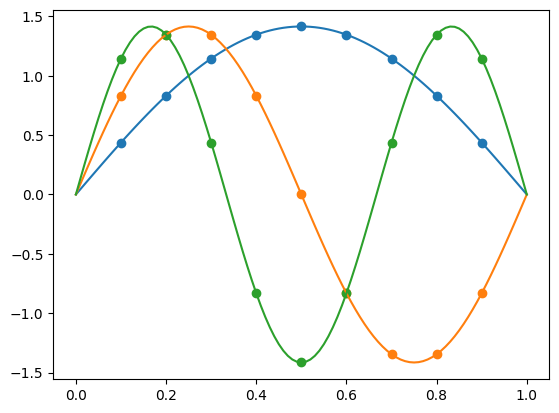

In [97]:
# Define the grid sizes for plotting
xd = np.linspace(0, 1, 101)
x = np.linspace(0, L, N)[1:-1]

# Plot the results for visualization
plt.figure()

# Plot the first three eigenstates vs the analytical states
for n in [1, 2, 3]:
    plt.plot(xd, np.sqrt(2) * np.sin(n * np.pi * xd))

    psi = V[:, n - 1] / np.sqrt(L/(N-1))
    plt.scatter(x, psi)

# Plot the results for visualization
plt.show()

# From the values shown they seem to compare reasonably well, although the
# third state slowly stops capturing the curvature well

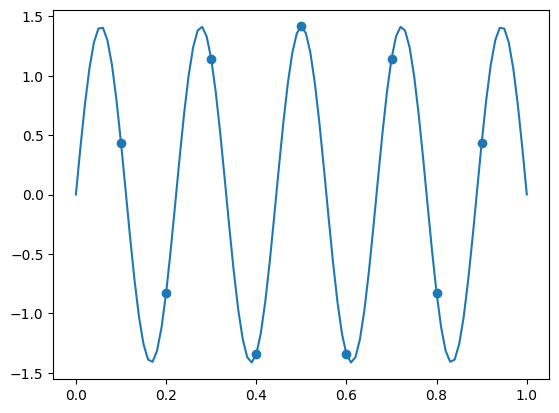

In [98]:
# Plots the ninth state
plt.figure()
# Plot the results for visualization
plt.plot(xd, np.sqrt(2)*np.sin(9*np.pi*xd))

psi = V[:,8]/np.sqrt(L/(N-1))
# Plot the results for visualization
plt.scatter(x, psi)
# Plot the results for visualization
plt.show()

# Doesn't capture the curvature well at all - seems completely jagged
# It seems as though the greater the energy error, the worse the curvature is captured

In [99]:
# Generating the potential function - diagonal in the position basis
def potentialOP(N, Lbox, c):
    x = np.linspace(-Lbox/2, 3*Lbox/2, N)
    V = np.zeros((N, N))

    for i in range(N):
        if x[i] <= 0 or x[i] >= Lbox:
            V[i, i] = c
        else:
            V[i, i] = 0.0

    return V, x

In [100]:
# Checks if the potential operator returns 0 inside the box and c outside
def test_potentialOP():
    N = 21
    L = 1.0
    c = 10.0

    V, x = potentialOP(N, L, c)

    for i in [0, 5, 10, 15, 20]:
        e = np.zeros(N)
        e[i] = 1.0
# Print key numeric results
        print("x =", x[i], " V|x_i> =", V @ e)


In [101]:
# Calculate the Hamiltonian T+V

N = 21
L = 1.0
m = 1.0
c = 1000.0

T = kineticOP(N, m, 2*L)
V, x = potentialOP(N, L, c)

H = T + V[1:-1, 1:-1]

E, psi = np.linalg.eigh(H)


E_analytic = np.pi**2 / 2

H_dirichlet = kineticOP(11, m, L)
E_dir, psi_dir = np.linalg.eigh(H_dirichlet)

# Print key numeric results
print("Finite barrier ground state:", E[0])
# Print key numeric results
print("Dirichlet ground state:", E_dir[0])
# Print key numeric results
print("Analytic ground state:", E_analytic)


Finite barrier ground state: 4.80423472186798
Dirichlet ground state: 4.894348370484679
Analytic ground state: 4.934802200544679


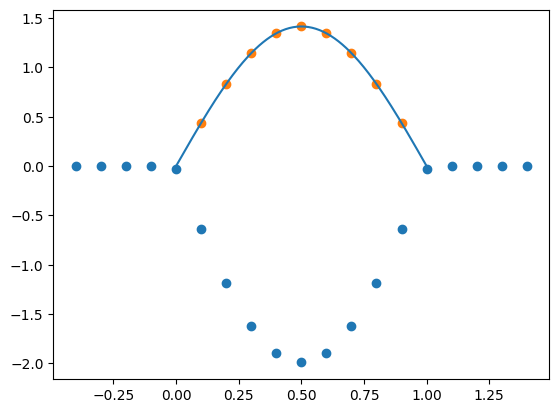

In [102]:
# Plot and compare the first eigenstate of T+V (blue dots), dirichlet(orange dots), and analytic(line)
xd = np.linspace(0, 1, 200)

# Plot the results for visualization
plt.figure()

# Plot the results for visualization
plt.plot(xd, np.sqrt(2) * np.sin(np.pi * xd))

psi_barrier = psi[:,0] / np.sqrt(L/(N-1))
# Plot the results for visualization
plt.scatter(x[1:-1], psi_barrier)

psi_dirichlet = psi_dir[:,0] / np.sqrt(1/(11-1))
x_dir = np.linspace(0,1,11)[1:-1]
# Plot the results for visualization
plt.scatter(x_dir, psi_dirichlet)

# Plot the results for visualization
plt.show()

#psi qualitatively seems quite close to zero outside the box

In [103]:
# Check the probability for outside the box for different c
def prob_outside(psi, x):
    outside = (x <= 0) | (x >= 1)
    return np.sum(psi[outside]**2)

N = 21
L = 1.0
m = 1.0

c_values = [10, 50, 100, 300, 1000, 3000]

# Loop over inputs to compute results
for c in c_values:
    T = kineticOP(N, m, 2*L)
    V, x = potentialOP(N, L, c)
    H = T + V[1:-1, 1:-1]

    E, psi = np.linalg.eigh(H)

    psi0 = psi[:,0]
    P_out = prob_outside(psi0, x[1:-1])

# Print key numeric results
    print("c =", c, "E0 =", E[0], "P(outside) =", P_out)
#around c ≈ 1000, the ground-state energy differs from the analytic
#value by about the same amount as the Dirichlet case
#Therefore, c = 1000 is a reasonable value

c = 10 E0 = 2.6310695197433684 P(outside) = 0.08149370192543669
c = 50 E0 = 3.875156054697117 P(outside) = 0.012642910156632077
c = 100 E0 = 4.254005910816794 P(outside) = 0.004610731755914102
c = 300 E0 = 4.625985086256167 P(outside) = 0.0007659135979929622
c = 1000 E0 = 4.80423472186798 P(outside) = 8.520516746417117e-05
c = 3000 E0 = 4.863152821568941 P(outside) = 1.0193579241901964e-05


In [104]:
# This cell performs the next step of the analysis
H_dir = kineticOP(11, m, L)
E_dir, psi_dir = np.linalg.eigh(H_dir)

# Print key numeric results
print("n   finite barrier     Dirichlet")
# Loop over inputs to compute results
for n in range(7):
# Print key numeric results
    print(n+1, E[n], E_dir[n])

#For low-energy states: energies agree very well,
#wavefunctions are strongly suppressed outside the box

#For higher-energy states: leakage outside increases
#energy discrepancies grow

n   finite barrier     Dirichlet
1 4.863152821568941 4.894348370484679
2 18.985096598835618 19.09830056250524
3 41.00601240526204 41.221474770752664
4 68.7987628128921 69.09830056250523
5 99.6666259123067 99.99999999999993
6 130.59812192301118 130.90169943749467
7 158.55750130237024 158.77852522924735


State 1: a = -2.061e-06, b = 8.111e-01, gamma = 1.995
State 2: a = -3.476e-05, b = 3.111e+00, gamma = 1.981
State 3: a = -1.777e-04, b = 6.528e+00, gamma = 1.957


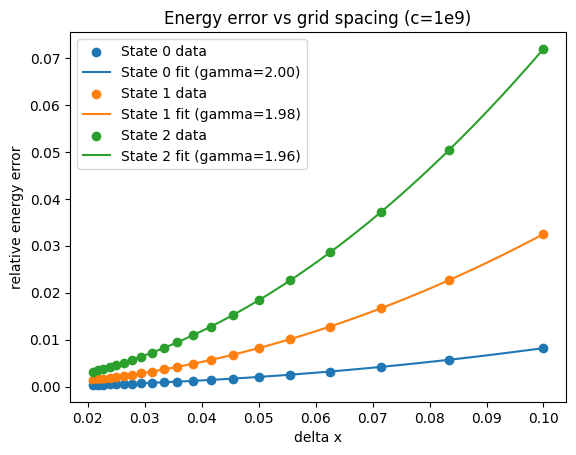

In [105]:
# Exercise 3: error vs grid spacing for the finite-barrier Hamiltonian (c=1e9)
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

L = 1.0
m = 1.0
c = 1.0e9

# Define helper function(s) used below
def analytic_energy(n, L=1.0, m=1.0):
    return (n**2) * (np.pi**2) / (2.0 * m * L**2)

# Define helper function(s) used below
def error_model(dx, a, b, gamma):
    return a + b * (dx ** gamma)

# Choose N so that x=0 and x=L are grid points for x in [-L/2, 3L/2]
# This requires N-1 divisible by 4, so N = 4k + 1
N_values = list(range(21, 101, 4))

dx_values = []
errors = []  # list of length len(N_values), each is [e1, e2, e3]

# Loop over inputs to compute results
for N in N_values:
    dx = (2.0 * L) / (N - 1)
    T = kineticOP(N, m, 2 * L)
    V, x = potentialOP(N, L, c)
    H = T + V[1:-1, 1:-1]

    E, psi = np.linalg.eigh(H)

    errs = []
    for n in [1, 2, 3]:
        E_ex = analytic_energy(n, L=L, m=m)
        rel_err = abs((E[n-1] - E_ex) / E_ex)
        errs.append(rel_err)

    dx_values.append(dx)
    errors.append(errs)

dx_values = np.array(dx_values)
errors = np.array(errors).T  # shape (3, len(N_values))

# Fit the error model for each of the first three states
fit_params = []
# Loop over inputs to compute results
for i in range(3):
    y = errors[i]
    # Initial guess: a ~ min error, b ~ (max-min), gamma ~ 2
    p0 = [y.min(), (y.max() - y.min()), 2.0]
    popt, pcov = curve_fit(error_model, dx_values, y, p0=p0, maxfev=10000)
    fit_params.append(popt)

# Print fit parameters
for i, (a, b, gamma) in enumerate(fit_params, start=1):
# Print key numeric results
    print(f'State {i}: a = {a:.3e}, b = {b:.3e}, gamma = {gamma:.3f}')

# Plot error vs dx with fitted curves
plt.figure()
# Loop over inputs to compute results
for i in range(3):
    plt.scatter(dx_values, errors[i], label=f'State {i} data')
    a, b, gamma = fit_params[i]
    dx_fit = np.linspace(dx_values.min(), dx_values.max(), 200)
    plt.plot(dx_fit, error_model(dx_fit, a, b, gamma), label=f'State {i} fit (gamma={gamma:.2f})')

# Plot the results for visualization
plt.xlabel('delta x')
# Plot the results for visualization
plt.ylabel('relative energy error')
# Plot the results for visualization
plt.title('Energy error vs grid spacing (c=1e9)')
# Plot the results for visualization
plt.legend()
# Plot the results for visualization
plt.show()



**Answer (Exercise 3a)**
The relative energy errors for the first three states decrease roughly as a power law in \Delta x with exponent close to 2. This matches the expected **second-order** accuracy of the finite-difference kinetic energy operator, so the error scales like \mathcal{O}(\Delta x^2). Higher states have larger errors at the same grid spacing because their wavefunctions have more curvature.


Fit for n=(N-1)/2-2: a = 5.246e-01, b = 2.097e+01, gamma = 118.303
N   n    dx        rel_error
 21   8 0.100000 4.272133e-01
 25  10 0.083333 4.554844e-01
 29  12 0.071429 4.756771e-01
 33  14 0.062500 4.907958e-01
 37  16 0.055556 5.025285e-01
 41  18 0.050000 5.118929e-01
 45  20 0.045455 5.195377e-01
 49  22 0.041667 5.258950e-01
 53  24 0.038462 5.312640e-01
 57  26 0.035714 5.358580e-01
 61  28 0.033333 5.398331e-01
 65  30 0.031250 5.433062e-01
 69  32 0.029412 5.463667e-01
 73  34 0.027778 5.490838e-01
 77  36 0.026316 5.515121e-01
 81  38 0.025000 5.536954e-01
 85  40 0.023810 5.556689e-01
 89  42 0.022727 5.574614e-01
 93  44 0.021739 5.590967e-01
 97  46 0.020833 5.605946e-01


C:\Users\aradh\AppData\Local\Temp\ipykernel_29712\372226856.py:46: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(error_model, dx_values, errors, p0=p0, maxfev=10000)


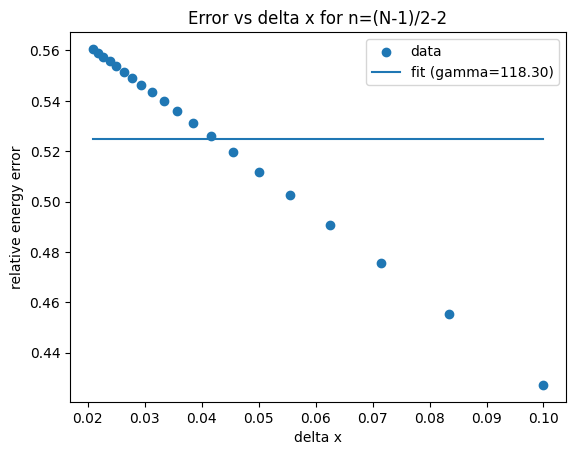

Explanation: Here n increases as N increases, so the state is higher-energy with more oscillations.
Even though delta x gets smaller, the wavelength also shrinks, so the discretization error does not
necessarily go to zero. The fit indicates that the error increases linearly with decreasing delta x, therefore it likely reaches a finite value as delta x -> 0


In [106]:
# Error vs delta x for eigenstate n = (N-1)/2 - 2 (integer when N = 4k+1)
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

L = 1.0
m = 1.0
c = 1.0e9

# Define helper function(s) used below
def analytic_energy(n, L=1.0, m=1.0):
    return (n**2) * (np.pi**2) / (2.0 * m * L**2)

# Define helper function(s) used below
def error_model(dx, a, b, gamma):
    return a + b * (dx ** gamma)

N_values = list(range(21, 101, 4))  # N = 4k+1 keeps x=0 and x=L on grid

dx_values = []
errors = []
n_values = []

# Loop over inputs to compute results
for N in N_values:
    n = int((N - 1) / 2 - 2)
    n_values.append(n)
    dx = (2.0 * L) / (N - 1)

    T = kineticOP(N, m, 2 * L)
    V, x = potentialOP(N, L, c)
    H = T + V[1:-1, 1:-1]
    E, psi = np.linalg.eigh(H)

    E_ex = analytic_energy(n, L=L, m=m)
    rel_err = abs((E[n-1] - E_ex) / E_ex)

    dx_values.append(dx)
    errors.append(rel_err)

dx_values = np.array(dx_values)
errors = np.array(errors)

# Fit the error model
p0 = [errors.min(), (errors.max() - errors.min()), 2.0]
popt, pcov = curve_fit(error_model, dx_values, errors, p0=p0, maxfev=10000)
a, b, gamma = popt
# Print key numeric results
print(f'Fit for n=(N-1)/2-2: a = {a:.3e}, b = {b:.3e}, gamma = {gamma:.3f}')

# Show a few rows so you can see n and error changing with N
print('N   n    dx        rel_error')
# Loop over inputs to compute results
for N, n, dx, err in zip(N_values, n_values, dx_values, errors):
# Print key numeric results
    print(f'{N:3d} {n:3d} {dx:0.6f} {err:0.6e}')

# Plot error vs dx with fitted curve
plt.figure()
# Plot the results for visualization
plt.scatter(dx_values, errors, label='data')
dx_fit = np.linspace(dx_values.min(), dx_values.max(), 200)
# Plot the results for visualization
plt.plot(dx_fit, error_model(dx_fit, a, b, gamma), label=f'fit (gamma={gamma:.2f})')
# Plot the results for visualization
plt.xlabel('delta x')
# Plot the results for visualization
plt.ylabel('relative energy error')
# Plot the results for visualization
plt.title('Error vs delta x for n=(N-1)/2-2')
# Plot the results for visualization
plt.legend()
# Plot the results for visualization
plt.show()

# Brief interpretation
print('Explanation: Here n increases as N increases, so the state is higher-energy with more oscillations.')
# Print key numeric results
print('Even though delta x gets smaller, the wavelength also shrinks, so the discretization error does not')
# Print key numeric results
print('necessarily go to zero. The fit indicates that the error increases linearly with decreasing delta x, therefore it likely reaches a finite value as delta x -> 0')


**Answer (Exercise 3b)**
For the state indexed by \(n = (N-1)/2 - 2\), the error does **not** converge to zero as \Delta x decreases. As N increases, this choice of n climbs to higher-energy states with shorter wavelengths, so the grid is always resolving a more oscillatory function. The decreasing \Delta x is offset by the shrinking wavelength, so the discretization error does not vanish.


Fit for fixed n=8: a = -9.800e-03, b = 2.192e+01, gamma = 1.698
N   dx        rel_error
 21 0.100000 4.272133e-01
 25 0.083333 3.160820e-01
 29 0.071429 2.413130e-01
 33 0.062500 1.894305e-01
 37 0.055556 1.522647e-01
 41 0.050000 1.248598e-01
 45 0.045455 1.041335e-01
 49 0.041667 8.810938e-02
 53 0.038462 7.548150e-02
 57 0.035714 6.536280e-02
 61 0.033333 5.713534e-02
 65 0.031250 5.035885e-02
 69 0.029412 4.471325e-02
 73 0.027778 3.996158e-02
 77 0.026316 3.592551e-02
 81 0.025000 3.246886e-02
 85 0.023810 2.948624e-02
 89 0.022727 2.689509e-02
 93 0.021739 2.463000e-02
 97 0.020833 2.263863e-02


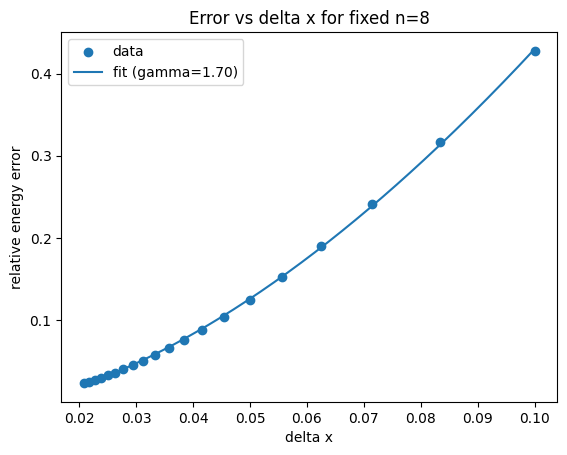

Explanation: This holds the physical state fixed while refining the grid.
So both the finite-difference kinetic error and the grid resolution error improve
together, and the error should decay ~ O(dx^2), similar to part (a).


In [107]:
# Error vs delta x for fixed eigenstate n=8 across N
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

L = 1.0
m = 1.0
c = 1.0e9
n_fixed = 8

# Define helper function(s) used below
def analytic_energy(n, L=1.0, m=1.0):
    return (n**2) * (np.pi**2) / (2.0 * m * L**2)

# Define helper function(s) used below
def error_model(dx, a, b, gamma):
    return a + b * (dx ** gamma)

N_values = list(range(21, 101, 4))  # N = 4k+1 keeps x=0 and x=L on grid

dx_values = []
errors = []

# Loop over inputs to compute results
for N in N_values:
    dx = (2.0 * L) / (N - 1)
    T = kineticOP(N, m, 2 * L)
    V, x = potentialOP(N, L, c)
    H = T + V[1:-1, 1:-1]
    E, psi = np.linalg.eigh(H)

    E_ex = analytic_energy(n_fixed, L=L, m=m)
    rel_err = abs((E[n_fixed-1] - E_ex) / E_ex)

    dx_values.append(dx)
    errors.append(rel_err)

dx_values = np.array(dx_values)
errors = np.array(errors)

# Fit the error model
p0 = [errors.min(), (errors.max() - errors.min()), 2.0]
popt, pcov = curve_fit(error_model, dx_values, errors, p0=p0, maxfev=10000)
a, b, gamma = popt
# Print key numeric results
print(f'Fit for fixed n=8: a = {a:.3e}, b = {b:.3e}, gamma = {gamma:.3f}')

# Print key numeric results
print('N   dx        rel_error')
# Loop over inputs to compute results
for N, dx, err in zip(N_values, dx_values, errors):
# Print key numeric results
    print(f'{N:3d} {dx:0.6f} {err:0.6e}')

# Plot the results for visualization
plt.figure()
# Plot the results for visualization
plt.scatter(dx_values, errors, label='data')
dx_fit = np.linspace(dx_values.min(), dx_values.max(), 200)
# Plot the results for visualization
plt.plot(dx_fit, error_model(dx_fit, a, b, gamma), label=f'fit (gamma={gamma:.2f})')
# Plot the results for visualization
plt.xlabel('delta x')
# Plot the results for visualization
plt.ylabel('relative energy error')
# Plot the results for visualization
plt.title('Error vs delta x for fixed n=8')
# Plot the results for visualization
plt.legend()
# Plot the results for visualization
plt.show()

# Brief interpretation
print('Explanation: This holds the physical state fixed while refining the grid.')
# Print key numeric results
print('So both the finite-difference kinetic error and the grid resolution error improve')
# Print key numeric results
print('together, and the error should decay ~ O(dx^2), similar to part (a).')


**Answer (Exercise 3c)**
For a **fixed** eigenstate (e.g., n=8), the error **does** converge toward zero with increasing N, similar to part (a). Here the physical state is held fixed while \Delta x shrinks, so both the **finite-difference kinetic energy error** and the **grid-resolution error** improve together. In contrast, part (b) kept the grid resolution per wavelength roughly constant by increasing n with N, so the error did not decay.


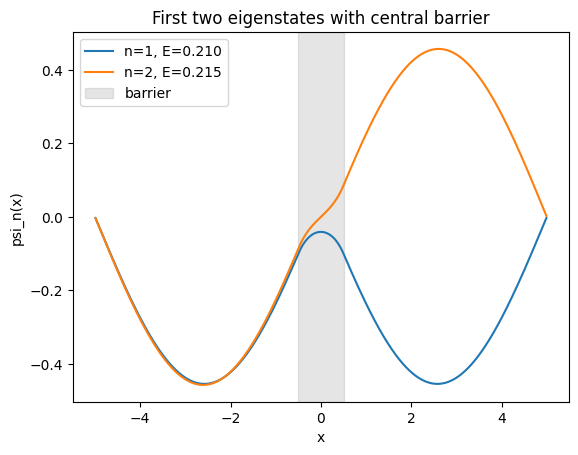

State 1: E = 0.210498, P(|x|<=0.5) = 3.873306e-03
State 2: E = 0.215310, P(|x|<=0.5) = 1.942020e-03


In [108]:
# Exercise 4: quantum tunneling through a finite barrier in an infinite well
import numpy as np
import matplotlib.pyplot as plt

# Define helper function(s) used below
def barrier_potential(N, x_left=-5.0, x_right=5.0, V0=5.0, width=1.0):
    x = np.linspace(x_left, x_right, N)
    V = np.zeros(N)
    half_w = width / 2.0
    # Finite barrier centered at 0
    mask = (x >= -half_w) & (x <= half_w)
    V[mask] = V0
    return V, x

# Parameters
hbar = 1.0
m = 1.0
V0 = 5.0
N = 1001
x_left, x_right = -5.0, 5.0
Lbox = x_right - x_left

# Build operators with Dirichlet boundaries (use interior points only)
T = kineticOP(N, m, Lbox)
V_full, x = barrier_potential(N, x_left=x_left, x_right=x_right, V0=V0, width=1.0)
x_in = x[1:-1]
V = np.diag(V_full[1:-1])

H = T + V
E, psi = np.linalg.eigh(H)

dx = Lbox / (N - 1)

# Plot first two eigenstates
plt.figure()
# Loop over inputs to compute results
for n in [0, 1]:
    psi_n = psi[:, n]
    # Normalize for plotting and probability
    psi_n = psi_n / np.sqrt(np.sum(np.abs(psi_n)**2) * dx)
    plt.plot(x_in, psi_n, label=f'n={n+1}, E={E[n]:.3f}')

# Plot barrier region for reference
plt.axvspan(-0.5, 0.5, color='gray', alpha=0.2, label='barrier')
# Plot the results for visualization
plt.xlabel('x')
# Plot the results for visualization
plt.ylabel('psi_n(x)')
# Plot the results for visualization
plt.title('First two eigenstates with central barrier')
# Plot the results for visualization
plt.legend()
# Plot the results for visualization
plt.show()

# Probability of being inside the barrier for the first two states
barrier_mask = (x_in >= -0.5) & (x_in <= 0.5)
# Loop over inputs to compute results
for n in [0, 1]:
    psi_n = psi[:, n]
    psi_n = psi_n / np.sqrt(np.sum(np.abs(psi_n)**2) * dx)
    prob_barrier = np.sum(np.abs(psi_n[barrier_mask])**2) * dx
# Print key numeric results
    print(f'State {n+1}: E = {E[n]:.6f}, P(|x|<=0.5) = {prob_barrier:.6e}')


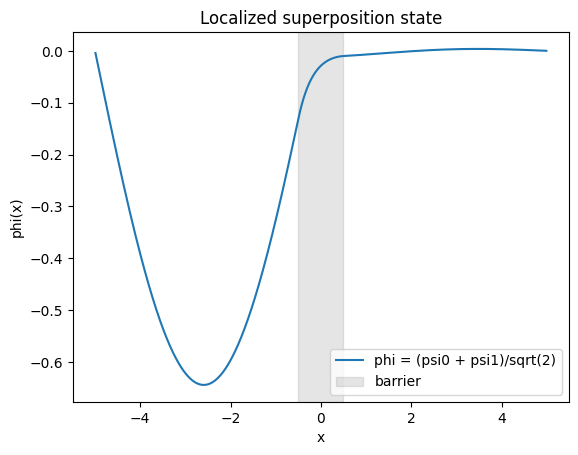

E0 = 0.210498
E1 = 0.215310
E_phi = 0.212904


In [109]:
# Localized superposition state phi = (psi0 + psi1)/sqrt(2)
# Assumes E and psi from previous cell are in scope
import numpy as np
import matplotlib.pyplot as plt

psi0 = psi[:, 0]
psi1 = psi[:, 1]

# Normalize eigenstates on the grid (good practice)
dx = (x_right - x_left) / (N - 1)
psi0 = psi0 / np.sqrt(np.sum(np.abs(psi0)**2) * dx)
psi1 = psi1 / np.sqrt(np.sum(np.abs(psi1)**2) * dx)

phi = (psi0 + psi1) / np.sqrt(2.0)
phi = phi / np.sqrt(np.sum(np.abs(phi)**2) * dx)

# Plot phi(x)
plt.figure()
# Plot the results for visualization
plt.plot(x_in, phi, label='phi = (psi0 + psi1)/sqrt(2)')
# Plot the results for visualization
plt.axvspan(-0.5, 0.5, color='gray', alpha=0.2, label='barrier')
# Plot the results for visualization
plt.xlabel('x')
# Plot the results for visualization
plt.ylabel('phi(x)')
# Plot the results for visualization
plt.title('Localized superposition state')
# Plot the results for visualization
plt.legend()
# Plot the results for visualization
plt.show()

E0 = E[0]
E1 = E[1]
E_phi = 0.5 * (E0 + E1)

# Print key numeric results
print(f'E0 = {E0:.6f}')
# Print key numeric results
print(f'E1 = {E1:.6f}')
# Print key numeric results
print(f'E_phi = {E_phi:.6f}')


**Answer (Exercise 4: localized superposition)**
The energies are E0, E1 from the two lowest eigenstates, and the superposition energy is \(E_\phi = (E_0 + E_1)/2\). Even though \(E_\phi \ll V_0\), the wavefunction is nonzero inside the barrier because tunneling allows finite amplitude in classically forbidden regions.


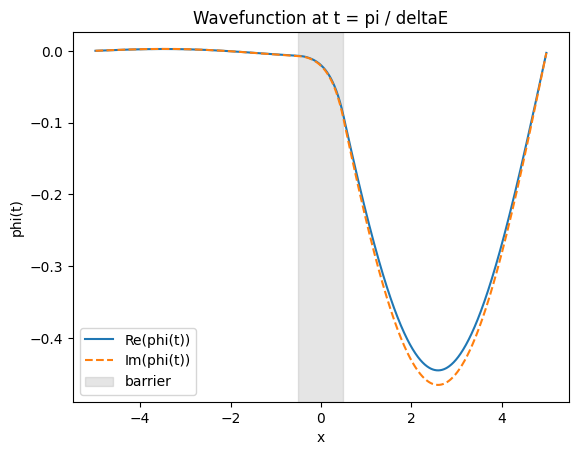

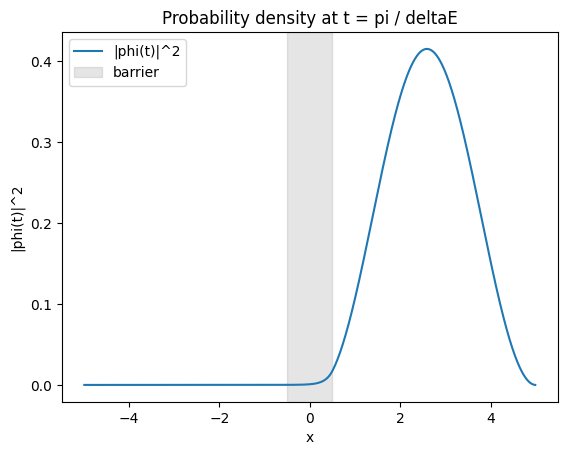

E0 = 0.210498, E1 = 0.215310, deltaE = 4.812154e-03, t = 652.845473


In [110]:
# Time evolution of phi(t) at t = pi / deltaE
import numpy as np
import matplotlib.pyplot as plt

# Assumes E, psi, x_in, dx, and barrier bounds from previous cells
E0 = E[0]
E1 = E[1]
deltaE = E1 - E0
t_tunnel = np.pi / deltaE

# Normalized eigenstates
psi0 = psi[:, 0]
psi1 = psi[:, 1]
psi0 = psi0 / np.sqrt(np.sum(np.abs(psi0)**2) * dx)
psi1 = psi1 / np.sqrt(np.sum(np.abs(psi1)**2) * dx)

phi_t = (np.exp(-1j * E0 * t_tunnel) * psi0 + np.exp(-1j * E1 * t_tunnel) * psi1) / np.sqrt(2.0)

# Plot the results for visualization
plt.figure()
# Plot the results for visualization
plt.plot(x_in, np.real(phi_t), label='Re(phi(t))')
# Plot the results for visualization
plt.plot(x_in, np.imag(phi_t), label='Im(phi(t))', linestyle='--')
# Plot the results for visualization
plt.axvspan(-0.5, 0.5, color='gray', alpha=0.2, label='barrier')
# Plot the results for visualization
plt.xlabel('x')
# Plot the results for visualization
plt.ylabel('phi(t)')
# Plot the results for visualization
plt.title('Wavefunction at t = pi / deltaE')
# Plot the results for visualization
plt.legend()
# Plot the results for visualization
plt.show()

# Optionally plot probability density
plt.figure()
# Plot the results for visualization
plt.plot(x_in, np.abs(phi_t)**2, label='|phi(t)|^2')
# Plot the results for visualization
plt.axvspan(-0.5, 0.5, color='gray', alpha=0.2, label='barrier')
# Plot the results for visualization
plt.xlabel('x')
# Plot the results for visualization
plt.ylabel('|phi(t)|^2')
# Plot the results for visualization
plt.title('Probability density at t = pi / deltaE')
# Plot the results for visualization
plt.legend()
# Plot the results for visualization
plt.show()

# Print key numeric results
print(f'E0 = {E0:.6f}, E1 = {E1:.6f}, deltaE = {deltaE:.6e}, t = {t_tunnel:.6f}')


**Answer (Exercise 4: time evolution)**
At \(t = \pi/\Delta E\), the relative phase between \(|\psi_0\rangle\) and \(|\psi_1\rangle\) flips sign, so the superposition localizes on the **opposite side** of the barrier. Physically, the probability density tunnels through the barrier: the initially localized packet oscillates between the left and right wells on the tunneling timescale.


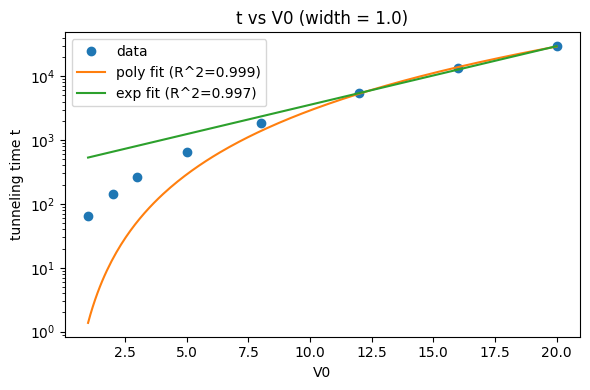

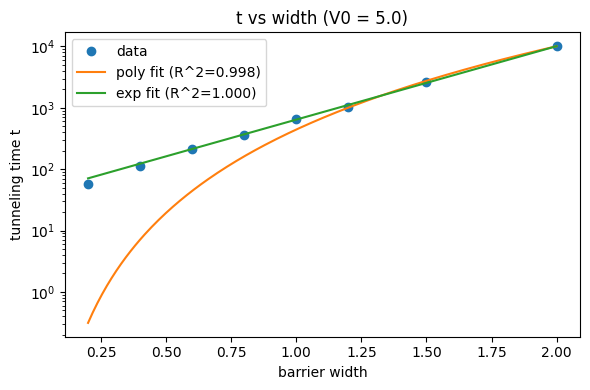

V0 fits: poly b,p = [1.37250352 3.32496182] exp A,k = [4.30191201e+02 2.11315260e-01]
width fits: poly b,p = [442.44822611   4.50792072] exp A,k = [40.82920108  2.75531276]


In [111]:
# Regenerate clean plots + fits (no offset terms) and save PNGs
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define helper function(s) used below
def tunneling_time(N, V0, width, x_left=-5.0, x_right=5.0, m=1.0):
    Lbox = x_right - x_left
    T = kineticOP(N, m, Lbox)
    V_full, x = barrier_potential(N, x_left=x_left, x_right=x_right, V0=V0, width=width)
    V = np.diag(V_full[1:-1])
    H = T + V
    E, psi = np.linalg.eigh(H)
    deltaE = E[1] - E[0]
    return np.pi / deltaE

# Define helper function(s) used below
def poly_model(x, b, p):
    return b * x**p

# Define helper function(s) used below
def exp_model(x, A, k):
    return A * np.exp(k * x)

# Define helper function(s) used below
def r2_score(y, yhat):
    ss_res = np.sum((y - yhat)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    return 1.0 - ss_res / ss_tot

N = 1001

# 1) Vary V0 at fixed width
width_fixed = 1.0
V0_values = np.array([1, 2, 3, 5, 8, 12, 16, 20], dtype=float)
t_values_V0 = np.array([tunneling_time(N, V0, width_fixed) for V0 in V0_values])

# Fit models without offsets to avoid weird behavior on log scale
popt_poly_V0, _ = curve_fit(poly_model, V0_values, t_values_V0, p0=[t_values_V0[0], 2.0], maxfev=10000)
popt_exp_V0, _ = curve_fit(exp_model, V0_values, t_values_V0, p0=[t_values_V0[0], 0.1], maxfev=10000)

xfit_V0 = np.linspace(V0_values.min(), V0_values.max(), 200)
tfit_poly_V0 = poly_model(xfit_V0, *popt_poly_V0)
tfit_exp_V0 = exp_model(xfit_V0, *popt_exp_V0)

r2_poly_V0 = r2_score(t_values_V0, poly_model(V0_values, *popt_poly_V0))
r2_exp_V0 = r2_score(t_values_V0, exp_model(V0_values, *popt_exp_V0))

# Plot the results for visualization
plt.figure(figsize=(6,4))
# Plot the results for visualization
plt.plot(V0_values, t_values_V0, marker='o', linestyle='none', label='data')
# Plot the results for visualization
plt.plot(xfit_V0, tfit_poly_V0, label=f'poly fit (R^2={r2_poly_V0:.3f})')
# Plot the results for visualization
plt.plot(xfit_V0, tfit_exp_V0, label=f'exp fit (R^2={r2_exp_V0:.3f})')
# Plot the results for visualization
plt.yscale('log')
# Plot the results for visualization
plt.xlabel('V0')
# Plot the results for visualization
plt.ylabel('tunneling time t')
# Plot the results for visualization
plt.title('t vs V0 (width = 1.0)')
# Plot the results for visualization
plt.legend()
# Plot the results for visualization
plt.tight_layout()
# Plot the results for visualization
plt.show()

# 2) Vary width at fixed V0
V0_fixed = 5.0
width_values = np.array([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.5, 2.0], dtype=float)
t_values_w = np.array([tunneling_time(N, V0_fixed, w) for w in width_values])

popt_poly_w, _ = curve_fit(poly_model, width_values, t_values_w, p0=[t_values_w[0], 2.0], maxfev=10000)
popt_exp_w, _ = curve_fit(exp_model, width_values, t_values_w, p0=[t_values_w[0], 1.0], maxfev=10000)

xfit_w = np.linspace(width_values.min(), width_values.max(), 200)
tfit_poly_w = poly_model(xfit_w, *popt_poly_w)
tfit_exp_w = exp_model(xfit_w, *popt_exp_w)

r2_poly_w = r2_score(t_values_w, poly_model(width_values, *popt_poly_w))
r2_exp_w = r2_score(t_values_w, exp_model(width_values, *popt_exp_w))

# Plot the results for visualization
plt.figure(figsize=(6,4))
# Plot the results for visualization
plt.plot(width_values, t_values_w, marker='o', linestyle='none', label='data')
# Plot the results for visualization
plt.plot(xfit_w, tfit_poly_w, label=f'poly fit (R^2={r2_poly_w:.3f})')
# Plot the results for visualization
plt.plot(xfit_w, tfit_exp_w, label=f'exp fit (R^2={r2_exp_w:.3f})')
# Plot the results for visualization
plt.yscale('log')
# Plot the results for visualization
plt.xlabel('barrier width')
# Plot the results for visualization
plt.ylabel('tunneling time t')
# Plot the results for visualization
plt.title('t vs width (V0 = 5.0)')
# Plot the results for visualization
plt.legend()
# Plot the results for visualization
plt.tight_layout()
# Plot the results for visualization
plt.show()

# Print key numeric results
print('V0 fits: poly b,p =', popt_poly_V0, 'exp A,k =', popt_exp_V0)
# Print key numeric results
print('width fits: poly b,p =', popt_poly_w, 'exp A,k =', popt_exp_w)


**Answer (Exercise 4: dependence on barrier height/width)**
The tunneling time grows rapidly as either **V0** or the **barrier width** increases. The log-scale plots and fits show behavior consistent with **exponential dependence** on barrier size (width and/or height), which is the expected result for tunneling through a classically forbidden region.
